## Linear Regression technique to establish the relation between the "Brain Weight" and "Head Size".

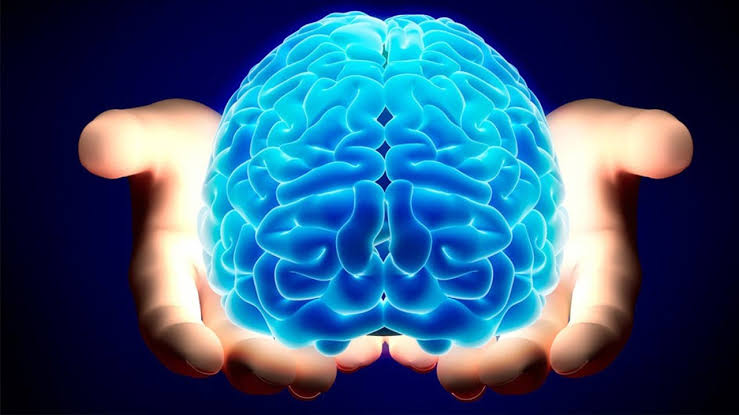

To do the Regression analysis on HeadBrain dataset.The input data is in .csv(comma seperated Values) so lets start with importing and Analyse the Data.

# Importing Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
HBDF = pd.read_csv("headbrain.csv")

# Comprehending the Data

In [3]:
HBDF.head(10) # Printing first 10 rows of dataset

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


It has total four columns(description is given below)

1.Gender      :  1 for male, 2 for female

2.Age Range   :  1 for ages 20-46,2 for over 46

3.Head size   :  head size in cubic cm

4.Brain Weight:  brain weight in grams


In [4]:
print(HBDF.shape) #Checking data dimension
HBDF.describe() # Statistical Summary

(237, 4)


,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


There are 237 Rows and 4 Columns in HBDF DataSet. And we can see there are NO missing Values because the count is similar for all the 4 columns.

In [5]:
print(HBDF.info()) # Checking the datatype of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


There is No categorical column exists in this dataset so encoding is not needed.

Here from understanding the given DataSet, The target variable is 'Brain Weight' which has continous data so it's a regression problem.

# Checking Null Values in DataSet

In [6]:
print(HBDF.isnull().sum()) # Checking if null values in the dataset.

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64


There are No Null Values in this Dataset.

# Checking for unique values in each column

In [7]:
print("Checking for unique values in each column:\n")
print(HBDF.nunique())

Checking for unique values in each column:

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64


# Visualization of Data using EDA 


# Here our Target Variable is a Continous data so we will do "UNIVARIATE ANALYSIS"

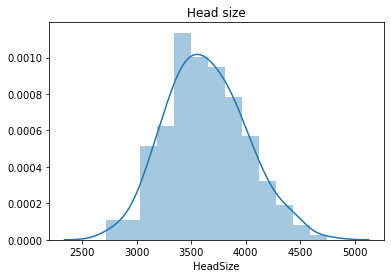

In [8]:
sns.distplot(HBDF["HeadSize"])
plt.title("Head size")
plt.show()

As we see the distribution of Head size is Normally distributed.

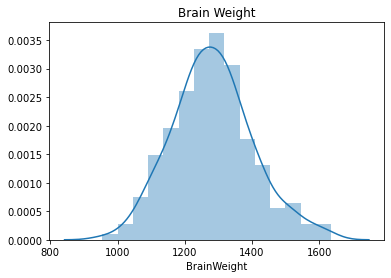

In [9]:
sns.distplot(HBDF["BrainWeight"])
plt.title("Brain Weight")
plt.show()

It is showing that data is normally dustributed in weight column.

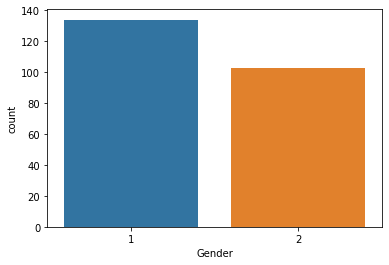

In [10]:
# Plotting the "Gender" Column
sns.countplot(HBDF['Gender'])
plt.show()


# Let us plot relation between the Head Size nd Brain Weight graphically

The scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables from our dataset.

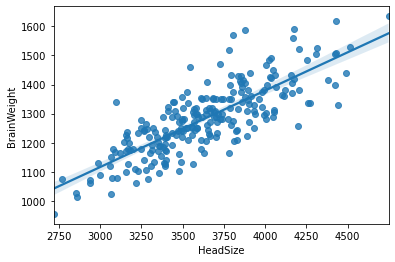

In [11]:
sns.regplot(x = HBDF['HeadSize'], y = HBDF['BrainWeight']);

There is a linear Relationship between 'HeadSize' and 'BrainWeight'

# Checking correlation using heatmap


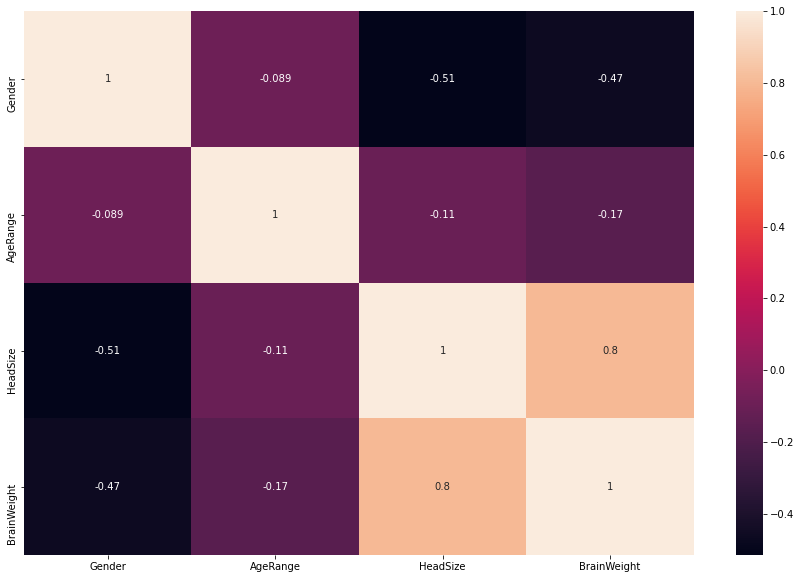

In [12]:
plt.subplots(figsize=(15, 10))
sns.heatmap(HBDF.corr(), annot = True)

The corelation Value of BrainWeight and Agerange is -0.17 so it has very low correlation. 

There is a Positive Correlation of HeadSize with target variable because it has high value compared to others i.e.,0.8.

The column age Range has no much contribution to our analysis, so we can drop the age range column

In [13]:
HBDF.drop("AgeRange",axis=1,inplace=True) # Dropping "Gender" column from dataset

Now we can cross check the data wheather the column 'AgeRange' is droped or not.

In [14]:
HBDF.columns

Index(['Gender', 'HeadSize', 'BrainWeight'], dtype='object')

# Detecting Outliers

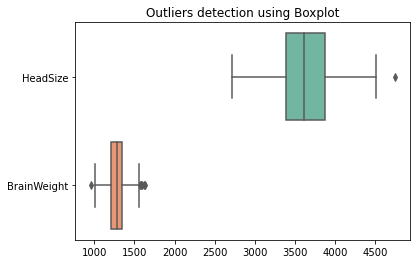

In [15]:
# Checking outliers using boxplot
sns.boxplot(data=HBDF[['HeadSize','BrainWeight']], orient='h', palette = "Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

On the above observation one can see there are ouliers in given dataset.we can remove this outliers using various Mathematical formula.
we can select simple method using "IQR".

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

# IQR score -

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier. Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

In [16]:
Q1 = HBDF.quantile(0.25)
Q3 = HBDF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender           1.0
HeadSize       487.0
BrainWeight    143.0
dtype: float64


In [17]:
HBDF_NEW1 = HBDF[~((HBDF < (Q1 - 1.5 * IQR)) |(HBDF > (Q3 + 1.5 * IQR))).any(axis=1)]
HBDF_NEW1.shape

(231, 3)

In [18]:
print("Original shape=",HBDF.shape,"\nNew shape(IQR)=",HBDF_NEW1.shape)

Original shape= (237, 3) 
New shape(IQR)= (231, 3)


Skewness is also an important factor which impacts distribution of the data. Always try to make the dataset less skewed.

In [19]:
# Checking the skewness (if exists)
HBDF_NEW1.skew()

Gender         0.236921
HeadSize       0.216878
BrainWeight    0.086071
dtype: float64

Skewness is in acceptable range(+/-0.5) so the data is not skewed.

# Preparing dataset for model training

In [20]:
x=HBDF_NEW1.drop("BrainWeight" , axis=1)
y=HBDF_NEW1["BrainWeight"]  # target variable

# Scaling

Model can be biased to higher values in dataset so it's better to scale the dataset so that we can bring all the column in common range. There are two algorithms available for scaling, StandardScaler and MinMaxScaler. We are going to use StandardScaler here.

In [21]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [22]:
good_rstate=0
accu=0
for i in range (30,250):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

In [23]:
print(f"Best accuracy {accu*100} found on random _state {best_rstate}")

Best accuracy 74.73601966689847 found on random _state 239


Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s). It can be used to check if there exists any correlation between the variables.

Simple Linear Regression -> relationship between just two variables (a dependent Vs an independent)
Multiple Regression -> relationship between two or more variables ( a dependent Vs 2 or more independent)
The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

# Model Evaluation

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=0.25,random_state=239)

LinearRegression

Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s). It can be used to check if there exists any correlation between the variables.

Simple Linear Regression -> relationship between just two variables (a dependent Vs an independent) Multiple Regression -> relationship between two or more variables ( a dependent Vs 2 or more independent) The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

In [25]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy=74.73601966689847, Cross_val_score = 55.29227837240541 & difference = 19.44374129449306


RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy=59.975844863515285, Cross_val_score = 39.30288101841815 & difference = 20.672963845097136


AdaBoostRegressor

In [27]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy=71.37082364693757, Cross_val_score = 46.53518488220371 & difference = 24.835638764733858


SGDRegressor

In [28]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy=74.7483462510161, Cross_val_score = 55.2809161053038 & difference = 19.4674301457123


# HyperTuning

In [31]:
parameters = {"max_iter": [500,700,900,1100,1200,1300,1400,1500],
               "alpha" :[0.0001, 0.001, 0.01,0.1,1,10,100],
               "penalty" : ["elasticnet", "l1", "l2"]}

In [32]:
from sklearn.model_selection import GridSearchCV

GCV= GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print("Final accuracy :",r2_score(y_test,GCV_pred)*100)

Final accuracy : 74.59684336853509


# Serialization

In [33]:
import joblib
joblib.dump(GCV.best_estimator_,"HeadBrainProject.pkl")

['HeadBrainProject.pkl']